## Transfer learning Cats vs Dogs
It recognizes an image and tells you if it is a cat or a dog.
at the end you can upload your image and check it. 

In [1]:
import tensorflow as tf
import os 
import zipfile
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from shutil import copyfile

In [2]:
ji= "kagglecatsanddogs_3367a.zip"

zipa= zipfile.ZipFile(ji,"r")
zipa.extractall("PetImages")
zipa.close()

In [3]:
print(" Number of Cats ",len(os.listdir("petImages/cat")))
print(" Number of Dogs ",len( os.listdir("petImages/dog")))


 Number of Cats  12501
 Number of Dogs  12501


In [4]:
# Create the folders.
try:
    os.mkdir("petImages/training")
    os.mkdir("petImages/testing")
    os.mkdir("petImages/training/cats")
    os.mkdir("petImages/testing/cats")
    os.mkdir("petImages/testing/dogs")
    os.mkdir("petImages/training/dogs")
    
except OSError:
    pass

In [5]:
# Split the images in training and testing folder.

def split_function(source,training,testing,split_size):
    files=[]
    for w in os.listdir(source):
        file= source+w
        if os.path.getsize(file)>0:
            files.append(w)
        else:
            print(f"The file {w} is zero length")
            
    train_size= int(len(files)*split_size)
    test_size=int(len(files) -train_size)
    
    files_new= random.sample(files,len(files))
    
    train= files_new[:train_size]
    test= files_new[train_size:]
    
    for m in train:
        archivo= source+m
        destination = training+m
        copyfile(archivo,destination)
        
    for j in test:
        archivo= source+j
        destination= testing+j
        copyfile(archivo,destination)
        
cat_source= "petImages/cat/"
cat_training="petImages/training/cats/"
cat_testing= "petImages/testing/cats/"
dog_source="petImages/dog/"
dog_training="petImages/training/dogs/"
dog_testing= "petImages/testing/dogs/"

split_size=0.9
        
split_function(cat_source,cat_training,cat_testing,split_size)
split_function(dog_source,dog_training,dog_testing,split_size)    
        

The file 666.jpg is zero length
The file 11702.jpg is zero length


In [6]:

print("Number of Cats in training",len(os.listdir("petImages/training/cats/")))
print("Number of Dogs in training",len(os.listdir("petImages/training/dogs/")))
print("Number of Dogs in testing",len(os.listdir("petImages/testing/dogs/")))
print("Number of Cats in testing",len(os.listdir("petImages/testing/cats")))


Number of Cats in training 12499
Number of Dogs in training 12488
Number of Dogs in testing 3401
Number of Cats in testing 4291


In [7]:
# create the labels and change a little the images in training
trian_dor="petImages/training/"
train_data= ImageDataGenerator(
    rescale= 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")
    
train_dir= train_data.flow_from_directory(
    trian_dor,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")
    
    

Found 24985 images belonging to 2 classes.


In [8]:
# create the labels in testing

validation_dor="petImages/testing/"
vali_data= ImageDataGenerator(rescale=1/255)

vali_dir= vali_data.flow_from_directory(
    validation_dor,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

Found 7690 images belonging to 2 classes.


## Model with InceptionV3

In [9]:
link="inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model= InceptionV3(input_shape=(150,150,3),
    include_top=False,
    weights=None)
   
# load pre-trained weights
pre_trained_model.load_weights(link)

# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer= pre_trained_model.get_layer("mixed7")
print('last layer output shape: ', last_layer.output_shape)

last_output=last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [10]:
print('last layer output shape: ', last_layer.output_shape)

last layer output shape:  (None, 7, 7, 768)


In [11]:
## definimos el modelo en un functional API
from tensorflow.keras.optimizers import RMSprop

In [13]:
x= tf.keras.layers.Flatten()(last_output)
x= tf.keras.layers.Dense(1024,activation="relu")(x)
x= tf.keras.layers.Dense(1,activation="sigmoid")(x)
model= Model(pre_trained_model.input,x)
model.compile(loss="binary_crossentropy",
             optimizer=RMSprop(lr=0.0001),
             metrics=["acc"])
history= model.fit(
    train_dir,
    validation_data=vali_dir,
    validation_steps=2,
    epochs=10,
    steps_per_epoch=20,
    verbose=2
)

Epoch 1/10
20/20 - 180s - loss: 0.6628 - acc: 0.8090 - val_loss: 0.1152 - val_acc: 0.9550
Epoch 2/10
20/20 - 192s - loss: 0.2048 - acc: 0.9110 - val_loss: 0.4663 - val_acc: 0.8400
Epoch 3/10
20/20 - 316s - loss: 0.2815 - acc: 0.8875 - val_loss: 0.1123 - val_acc: 0.9550
Epoch 4/10
20/20 - 251s - loss: 0.2123 - acc: 0.9060 - val_loss: 0.1148 - val_acc: 0.9600
Epoch 5/10
20/20 - 159s - loss: 0.2060 - acc: 0.9100 - val_loss: 0.1521 - val_acc: 0.9350
Epoch 6/10


C:\Users\Carmona\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  "Possibly corrupt EXIF data.  "
C:\Users\Carmona\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  "Possibly corrupt EXIF data.  "
C:\Users\Carmona\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  "Possibly corrupt EXIF data.  "
C:\Users\Carmona\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  "Possibly corrupt EXIF data.  "
C:\Users\Carmona\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping t

20/20 - 150s - loss: 0.1995 - acc: 0.9125 - val_loss: 0.0672 - val_acc: 0.9850
Epoch 7/10
20/20 - 134s - loss: 0.1786 - acc: 0.9255 - val_loss: 0.0331 - val_acc: 0.9850
Epoch 8/10
20/20 - 132s - loss: 0.1685 - acc: 0.9295 - val_loss: 0.0725 - val_acc: 0.9750
Epoch 9/10
20/20 - 146s - loss: 0.1816 - acc: 0.9255 - val_loss: 0.1017 - val_acc: 0.9600
Epoch 10/10
20/20 - 130s - loss: 0.1382 - acc: 0.9436 - val_loss: 0.0818 - val_acc: 0.9650


<Figure size 432x288 with 0 Axes>

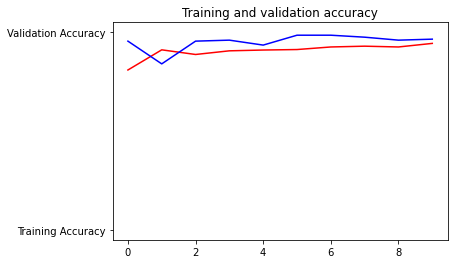

<Figure size 432x288 with 0 Axes>

In [14]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
 
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

In [15]:
#put your image:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

ModuleNotFoundError: No module named 'google.colab'